# Project : Pricing
***
**PARIS SACLAY UNIVRSITY**  
**Author** : ELKADDOURI MEHDI
***
### Summary  

Within the framework of this project, we will exploit the formula of black and scholes to price the call and the put during times and at maturity.   Similarly, we will use the simulation of Mont-carlo to price the European, asian,barrier calls and puts.  

On the other hand, we'll price the implied volatility using market data. For the stochastic volatility, we will use Heston model

***



### Packages and modules 

***my_data*** : it's a module of the package ***data*** that aims to manipulate data.  
***my_pricing*** : it's module that aims to price the data.  
***payoff*** : it calculates *the payoff* of differents products ( used in montecarlo simulation)  
***
 *each code is commented to make the user understand its functionnality* 


In [1]:
from data import my_data
import matplotlib.pyplot as plt
from Pricing import my_pricing
from payoff import my_payoff
import numpy as np

### Tutorial  
In this tutorial, i will use the apple stock data from Yahoo finance : 
 1. Bring the data using my_data module
 ***
 ***log_retun()***: returns the log_return of my stock_data  
 ***std_return()***: returns the annual volatility

In [2]:
AAPL=my_data('AAPL')
AAPL_log_return=AAPL.log_return() # log return of apple stock
AAPL_std=AAPL.std_return()  # standard deviation of apple log_return

#### 2. pricing data using *the my_pricing* functions:

\begin{equation}
r S_{t} \frac{\partial C}{\partial S}+\frac{\partial C}{\partial t}+\frac{1}{2} \sigma^{2} S^{2} \frac{\partial^{2} C}{\partial S^{2}}-r C=0
\end{equation}

is a Partial Differential Equation (PDE) describing how the option value $V(S, t)$ depends on the stock price $S$ and time $t$.
In equation above, $\sigma$ is the volatility of the underlying asset,and $r$ is the interest rate. Both $\sigma$ and $r$ are considered given, while $C$ is the quantity being computed (or approximated).

The call using ***black scholes formula***:
\begin{equation}
	\mathrm C(\mathrm S,\mathrm t)= \mathrm N(\mathrm d_1)\mathrm S - \mathrm N(\mathrm d_2) \mathrm K \mathrm e^{-rt}
	\label{eq:2}
\end{equation}
The put formula using ***Black scholes formula***:
\begin{equation}
	\mathrm P(\mathrm S,\mathrm t)= \mathrm -N(\mathrm -d_1)\mathrm S + \mathrm N(\mathrm -d_2) \mathrm K \mathrm e^{-rt}
	\label{eq:3}
\end{equation}  

where  

\begin{equation}
	\mathrm d_1= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r + \frac{\sigma^2}{2} \right) \right]
\end{equation}

\begin{equation}
	\mathrm d_2= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{K}\right)} + t\left(r - \frac{\sigma^2}{2} \right) \right]
\end{equation} 
***



In [3]:
B=my_pricing(AAPL.donnee,100,0.05,AAPL_std,1) #aaple.donnee is stock values

***Call_BSM()*** is a function that return the european call .

In [4]:
B.Call_BSM()

39.774146771948

***Put_BSM()*** is a function that return the european call .

In [5]:
B.Put_BSM()

2.207086780613146

***
The delta  is given by the following formula:  
  

 $ \Delta_c $: the delta call
\begin{equation}
	\Delta_c =   \frac{\partial C}{\partial S}
\end{equation}
 $ \Delta_p $: the delta put
\begin{equation}
	\Delta_p =   \frac{\partial P}{\partial S}   
\end{equation}

In [6]:
B.delta_call()

array([0.89718772])

In [7]:
B.delta_put()

array([-0.10281228])

***
Gamma option function formula : 
  
    
\begin{equation}
	\Gamma =   \frac{\partial^2 \Delta}{\partial^2 S }  = exp ( - rt ) . \frac{ 1}{  S σ√T} . N’( d1 )
\end{equation}
***
Vega option formula:
\begin{equation}
\text { vega} =\frac{\partial C}{\partial \sigma}=e^{-r T} S \sqrt{T} \phi\left(d_{1}\right)
\end{equation}

In [8]:
B.gamma()

AAPL    0.600789
dtype: float64

In [9]:
B.vega()

AAPL    23.76213
Name: 2020-12-31 00:00:00, dtype: float64

## Second Part
In this part, we'll explore the Monte-carlo simulation.  

the ***payoff*** package give us the payoff the given product.

**remark** : During my work i have implemented the Monte-carlo simulation in  my pycharm code but when calling it , it generates an error of index even if everything is well (probably only in my laptop). I 'll implement the same code in jupyter and explore it . 





In [10]:
#Montecarlos Simulation
T=1
r=0.05
t_intervals=250
delta_t= T/t_intervals
iterations=10000
stdev=float(AAPL.stdev)
Z=np.random.standard_normal((t_intervals+1,iterations))
S= np.zeros_like(Z)
S0=AAPL.donnee.iloc[-1]
S[0]=S0
for t in range(1,t_intervals+1):
    S[t]= S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
    

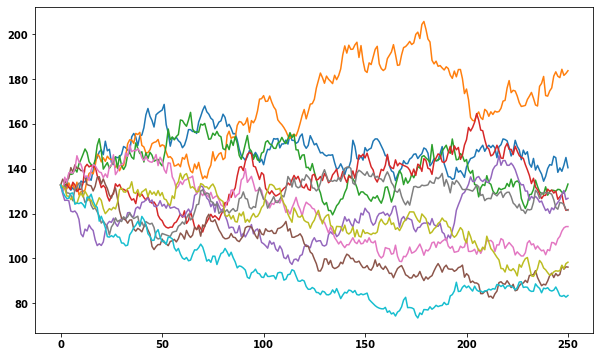

In [12]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10]);
# the montecarlo simulation

*Let's explore the monte_carlo simulation to find the value of the european call*

In [24]:
AAPL_payoff=my_payoff(S,100)

In [25]:
B.pricing_montecarlo(AAPL_payoff.european_call(),iterations)

39.58126042087989

***As we can see the value given of callby the simulation of Monte-carlo is quietly the same of Black and scholes Formula***

In [26]:
B.pricing_montecarlo(AAPL_payoff.european_put(),iterations)

2.262858857268304

***As we can see the value of put given by the simulation of Monte-carlo is quietly the same of Black and scholes Formula***

***
In this part we'll try to price the :
1. Knock_in_call
2. Knock_in_put
3. Knock_out_call
4. Knock_out_put
5. asian_call



In [27]:
B.pricing_montecarlo(AAPL_payoff.Knock_in_call(100),iterations) #100 is the barrier

39.58126042087989

In [28]:
B.pricing_montecarlo(AAPL_payoff.Knock_in_put(100),iterations) #100 is the barrier

2.262858857268304

In [29]:
B.pricing_montecarlo(AAPL_payoff.Knock_out_call(100),iterations) #100 is the barrier

0.0

In [30]:
B.pricing_montecarlo(AAPL_payoff.Knock_out_put(100),iterations) #100 is the barrier

0.0

In [33]:
B.pricing_montecarlo(AAPL_payoff.asian_call(),iterations) 

0.8579589433157191

## Third part
### Stochastic volatility
One of the major simplifying assumptions of the Black-Scholes-Merton model is the constant volatility. However, volatility in general is neither constant nor deterministic; it is stochastic. Therefore, a major advancement with regard to financial modeling was achieved in the early 1990s with the introduction of so-called stochastic volatility models.
One of the most popular models that fall into that category is that of Heston (1993), which
is presented in the following equations :  
\begin{equation}
\begin{aligned}
dS_{t} &=r S_{t} d t+\sqrt{v}_{t} S_{t} d Z_{t}^{1} \\
dv_{t} &=\kappa_{v}\left(\theta_{v}-v_{t}\right) d t+\sigma_{v} \sqrt{v}_{t} d Z_{t}^{2} \\ 
 dZ_{t}^{1} d Z_{t}^{2} &=\rho
\end{aligned}
\end{equation} 

The meaning of the single variables and parameters can now be inferred easily from the discussion of the geometric Brownian motion and the square-root diffusion. The parameter represents the instantaneous correlation between the two standard Brownian motions $ Z_t^1 Z_t^2 $ . This allows us to account for a stylized fact called the leverage effect, which in
essence states that volatility goes up in times of stress (declining markets) and goes down
in times of a bull market (rising markets).  


In [34]:
S0 = AAPL.donnee.iloc[-1]
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0
M = 50
I = 10000


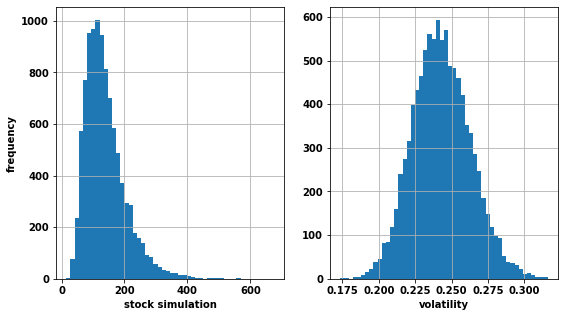

In [35]:
v=B.model_heston(v0,kappa,theta,sigma,rho,T,M,I)
S=B.asset_heston(S0,T,I,v,rho,M,r)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('stock simulation')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)
plt.show()

***
The results above shows the simulation results as a histogram for both the index level process
and the volatility process
***


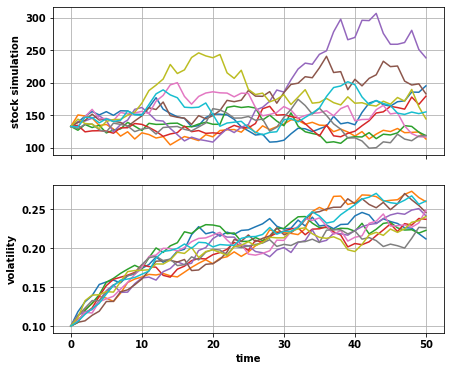

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('stock simulation')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

An inspection of the first 10 simulated paths of each process  shows that the volatility process is drifting positively on average and that it, as expected, converges to  v = 0.25

## fourth part 
### The implied volatility

In this part, we'll be in need of market data 
i have implemented the function ***market_call_price*** to bring the call data available in the market given the strike,the date and the ticker.This function may returns nothing if there's no available data.  
the function ***vizualize_calls*** will let the user to find the market data given the month,year and the ticker *it will help using the market_call_price*


In [37]:
AAPL.vizualize_calls(2021,2,'AAPL')

,,,,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Strike,Expiry,Type,Symbol,,,,,,,,,,,,,,,
25.0,2021-02-19,call,AAPL210219C00025000,107.17,106.45,107.20,-9.980003,-8.518995,1.0,15.0,3.398439,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-29 16:53:45,"{'contractSymbol': 'AAPL210219C00025000', 'str..."
30.0,2021-02-19,call,AAPL210219C00030000,98.20,101.45,102.20,0.000000,0.000000,NaN,29.0,3.031252,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-19 05:12:38,"{'contractSymbol': 'AAPL210219C00030000', 'str..."
35.0,2021-02-19,call,AAPL210219C00035000,108.00,96.45,97.20,0.000000,0.000000,1.0,49.0,2.726566,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-26 18:43:01,"{'contractSymbol': 'AAPL210219C00035000', 'str..."
40.0,2021-02-19,call,AAPL210219C00040000,87.96,91.45,92.20,0.000000,0.000000,2.0,48.0,2.464848,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-14 18:26:03,"{'contractSymbol': 'AAPL210219C00040000', 'str..."
45.0,2021-02-19,call,AAPL210219C00045000,93.70,86.45,87.20,0.000000,0.000000,50.0,87.0,2.234379,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-28 14:40:50,"{'contractSymbol': 'AAPL210219C00045000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210.0,2021-02-19,call,AAPL210219C00210000,0.06,0.06,0.07,-0.050000,-45.454548,235.0,1325.0,0.820314,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-29 20:21:15,"{'contractSymbol': 'AAPL210219C00210000', 'str..."
215.0,2021-02-19,call,AAPL210219C00215000,0.06,0.05,0.06,-0.040000,-40.000004,4.0,1405.0,0.839845,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-29 20:15:15,"{'contractSymbol': 'AAPL210219C00215000', 'str..."
220.0,2021-02-19,call,AAPL210219C00220000,0.05,0.04,0.05,-0.020000,-28.571426,110.0,484.0,0.855470,AAPL,False,AAPL,131.96,2021-01-29 21:00:02,2021-01-29 20:52:46,"{'contractSymbol': 'AAPL210219C00220000', 'str..."


Let's explore the call of 2021-2-19 and strike 25

In [38]:
AAPL.market_call_price(2021,2,19,'AAPL',25)

,AAPL
0,107.17


As we can see market_call_price perfectly gives the results of the market call

In [39]:
B.implied_vol(AAPL.market_call_price(2021,2,19,'AAPL',25),'AAPL')

0.50005

The function above gives the value of the implied volatility , it's based on black and scholes formula.  
I try to find the volatility that  fit with the market call price.  
